# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "39394ea25014909e2c45b4210fe78d77f5440470"
connection.set_access_token(API_TOKEN)

Access token is valid.


#### NOTE: Before creating or executing the strategy, ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).![Reference](https://algobulls.github.io/pyalgotrading/python_build/imgs_v2/python_build_Oauth_successful.png)

# Strategy Creation

## Import Strategy from pyalgostrategypool

In [5]:
! wget -O ema_crossover_us.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/ema_regular_order/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' ema_crossover_us.py

--2024-01-13 23:40:14--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/ema_regular_order/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2546 (2.5K) [text/plain]
Saving to: ‘ema_crossover_us.py’

ema_crossover_us.py 100%[===================>]   2.49K  --.-KB/s    in 0s      

2024-01-13 23:40:14 (57.4 MB/s) - ‘ema_crossover_us.py’ saved [2546/2546]



In [6]:
from ema_crossover_us import EMARegularOrder as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 139800,
 'strategyId': '515cc74b33e141af98033862af66dc67'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('MSFT', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:MSFT'

## Setup Parameters

In [10]:
parameters = {
  'TIMEPERIOD1': 12,
  'TIMEPERIOD2': 20,
}

In [11]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:MSFT', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds
)


Starting the strategy 'EMA Regular Order' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Strategy Name           │ EMA Regular Order                      │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:MSFT']                        │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 5                                      │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00-04:00              │
├─────────────────────────┼────────────────────────────────────────┤
│ End Timestamp           │ 2023-07-3

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (9)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]


----------------------------------------
Faced an error while fetching logs.
----------------------------------------


----------------------------------------
Faced an error while fetching logs.
----------------------------------------


----------------------------------------
Faced an error while fetching logs.
----------------------------------------



In [15]:
print(logs)

[2024-01-13 23:41:07] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-01-13 23:41:07] Sanity checks on cfg successful.
[2024-01-13 23:41:07] Currency set to "USD"
[2024-01-13 23:41:07] Setting up broker connection...
[2024-01-13 23:41:09] Starting ALPACAV2 in PAPER mode...
[2024-01-13 23:41:10] Broker connection has been setup successfully.
[2024-01-13 23:41:10] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2024-01-13 23:41:10] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-01-13 23:41:10] Welcome ALGOBULLS VIRTUAL USER!
[2024-01-13 23:41:10] Reading strategy...
[2024-01-13 23:41:10] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


## Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NASDAQ,MSFT,2021-08-04 10:30:00-04:00,SELL,5,$,284.77,,2021-08-04 15:30:00-04:00,BUY,5,$,286.45,,-8.40,-8.40,0,-8.40
1,NASDAQ,MSFT,2021-08-10 11:30:00-04:00,SELL,5,$,285.73,,2021-08-10 15:30:00-04:00,BUY,5,$,285.83,,-0.50,-8.90,0,-0.50
2,NASDAQ,MSFT,2021-08-12 12:30:00-04:00,BUY,5,$,289.04,,2021-08-12 13:30:00-04:00,SELL,5,$,289.04,,0.00,-8.90,0,0.00
3,NASDAQ,MSFT,2021-08-12 13:30:00-04:00,BUY,5,$,289.04,,2021-08-12 14:30:00-04:00,SELL,5,$,289.04,,0.00,-8.90,0,0.00
4,NASDAQ,MSFT,2021-08-12 14:30:00-04:00,BUY,5,$,289.04,,2021-08-12 15:30:00-04:00,SELL,5,$,289.04,,0.00,-8.90,0,0.00
5,NASDAQ,MSFT,2021-08-19 12:30:00-04:00,BUY,5,$,294.43,,2021-08-19 13:30:00-04:00,SELL,5,$,294.43,,0.00,-8.90,0,0.00
6,NASDAQ,MSFT,2021-08-19 13:30:00-04:00,BUY,5,$,294.43,,2021-08-19 14:30:00-04:00,SELL,5,$,294.43,,0.00,-8.90,0,0.00
7,NASDAQ,MSFT,2021-08-19 14:30:00-04:00,BUY,5,$,294.43,,2021-08-19 15:30:00-04:00,SELL,5,$,294.43,,0.00,-8.90,0,0.00
8,NASDAQ,MSFT,2021-08-26 10:30:00-04:00,SELL,5,$,300.19,,2021-08-26 15:30:00-04:00,BUY,5,$,300.43,,-1.20,-10.10,0,-1.20
9,NASDAQ,MSFT,2021-08-30 10:30:00-04:00,BUY,5,$,303.71,,2021-08-30 15:30:00-04:00,SELL,5,$,303.37,,-1.70,-11.80,0,-1.70


## Statistics Reports

### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-04
End Period          2023-07-12
Risk-Free Rate      0.0%
Time in Market      54.0%

Cumulative Return   2.86%
CAGR﹪              1.46%

Sharpe              2.08
Prob. Sharpe Ratio  89.56%
Sortino             3.31
Sortino/√2          2.34
Omega               1.64

Max Drawdown        -1.42%
Longest DD Days     282

Gain/Pain Ratio     0.64
Gain/Pain (1M)      0.89

Payoff Ratio        1.35
Profit Factor       1.64
Common Sense Ratio  2.67
CPC Index           1.21
Tail Ratio          1.63
Outlier Win Ratio   5.29
Outlier Loss Ratio  2.95

MTD                 -0.49%
3M                  0.06%
6M                  1.7%
YTD                 1.7%
1Y                  1.4%
3Y (ann.)           1.46%
5Y (ann.)           1.46%
10Y (ann.)          1.46%
All-time (ann.)     1.46%

Avg. Drawdown       -0.43%
Avg. Drawdown Days  56
Recovery Factor     2.02
Ulcer Index         0.01
Serenity Index      0.83


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-04
End Period                 2023-07-12
Risk-Free Rate             0.0%
Time in Market             54.0%

Cumulative Return          2.86%
CAGR﹪                     1.46%

Sharpe                     2.08
Prob. Sharpe Ratio         89.56%
Smart Sharpe               1.75
Sortino                    3.31
Smart Sortino              2.78
Sortino/√2                 2.34
Smart Sortino/√2           1.97
Omega                      1.64

Max Drawdown               -1.42%
Longest DD Days            282
Volatility (ann.)          3.59%
Calmar                     1.03
Skew                       -0.11
Kurtosis                   4.49

Expected Daily %           0.03%
Expected Monthly %         0.12%
Expected Yearly %          0.94%
Kelly Criterion            21.44%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.34%
Expected Shortfall (cVaR)  -0.34%

Max Consecutive Wins       6


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-05-24,2022-10-07,2023-03-03,282,-1.416133,-1.326860
2,2022-01-12,2022-02-25,2022-04-27,105,-1.194872,-1.014537
3,2023-05-15,2023-06-01,2023-06-07,22,-0.571290,-0.257688
4,2023-07-12,2023-07-12,2023-07-12,0,-0.489602,NaN
5,2021-08-10,2021-08-30,2021-09-14,35,-0.085179,-0.050105


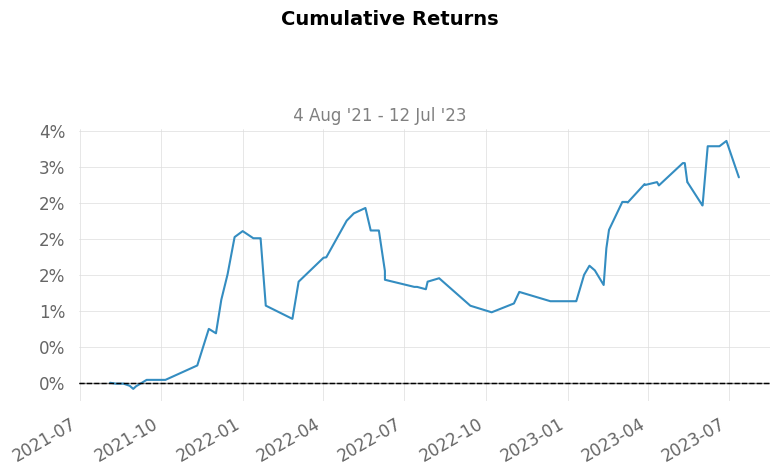

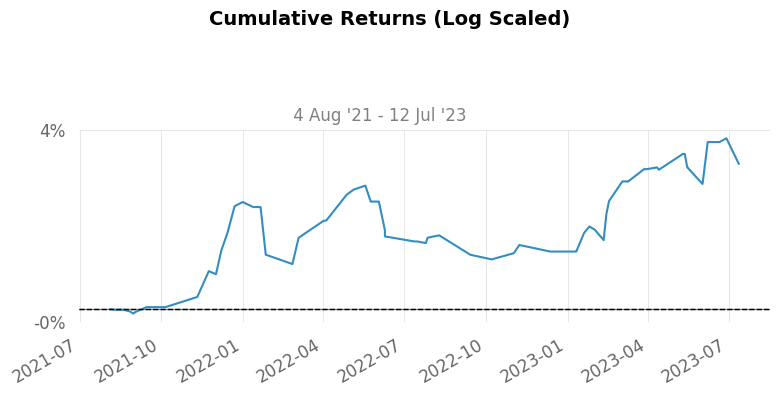

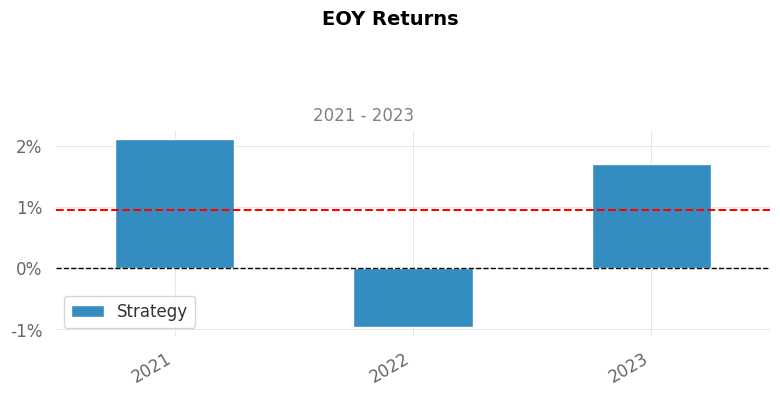

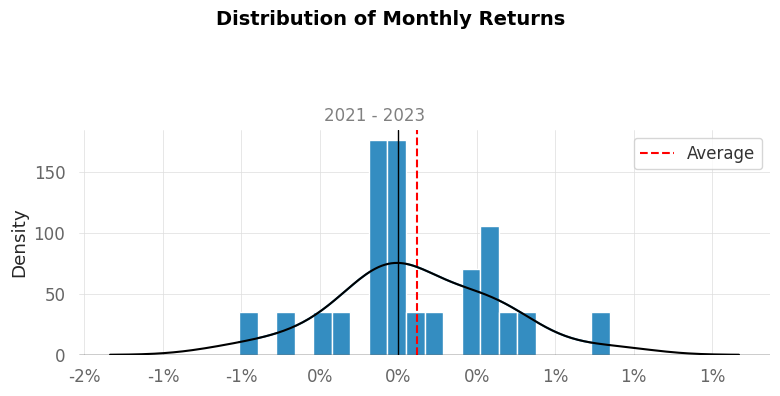

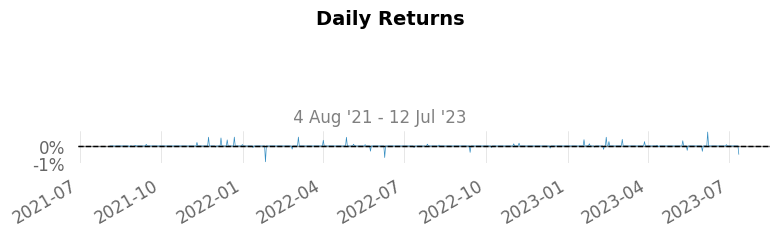

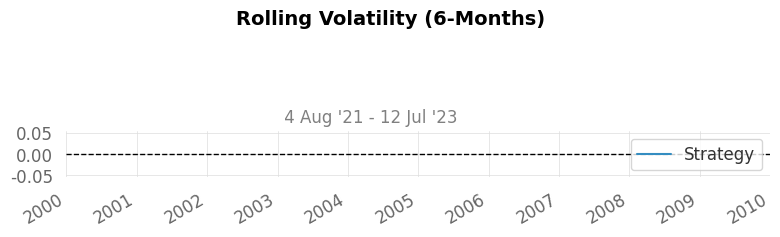

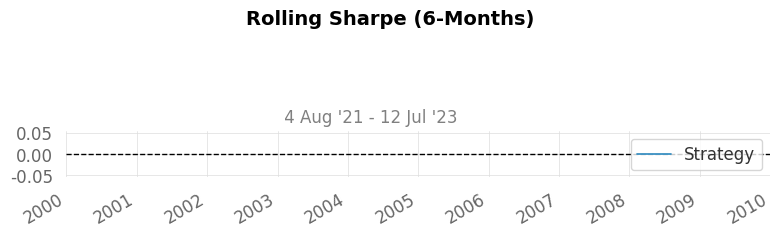

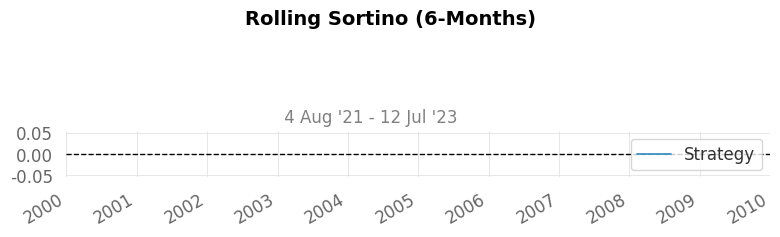

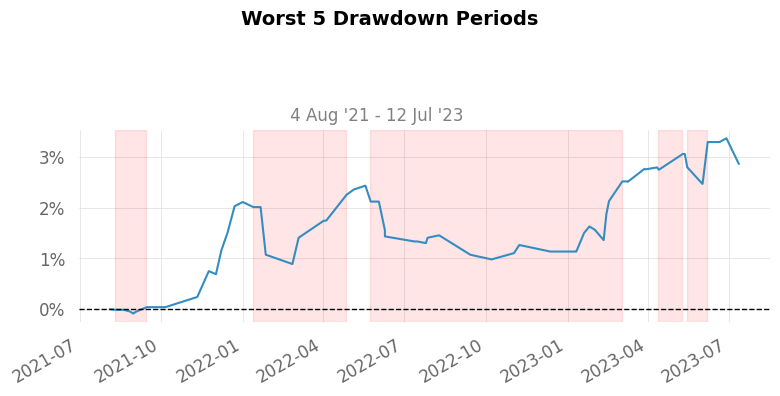

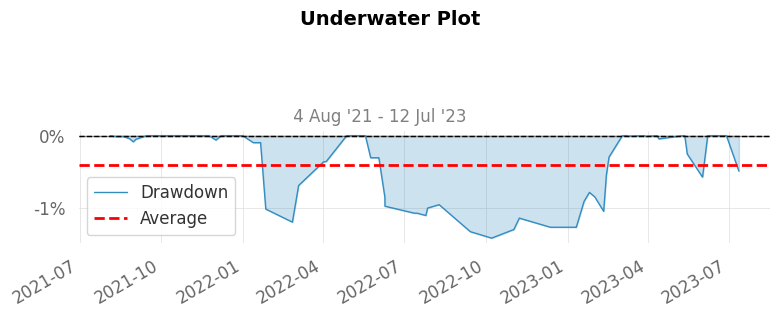

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


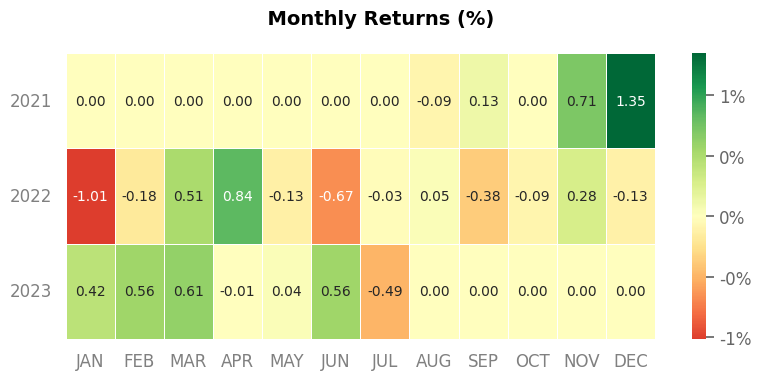

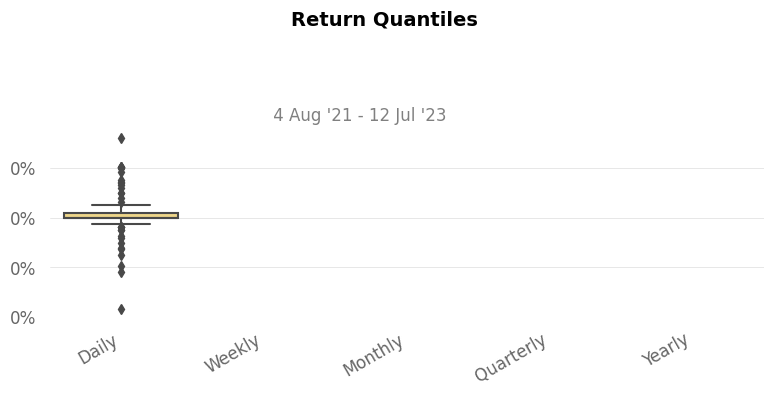

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 468691fc8f77495f9060969f73d7c285 |
| Transaction Type | SELL                             |
| Instrument       | NASDAQ:MSFT                      |
| Quantity         | 5                                |
| Price            | $247.28                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2024-01-13T18:16:47.779114Z | COMPLETE               |
| 2024-01-13T18:16:47.779098Z | OPEN                   |
| 2024-01-13T18:16:47.779082Z | OPEN PENDING           |
| 2024-01-13T18:16:47.779054Z | VALIDATION PENDING     |
| 2024-01-13T18:16:47.779013Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | f437504b0836401a8

## Papertrading

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:MSFT', 
    lots=5,
    parameters=parameters, 
    candle='1 minute'
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
broking_details = {
    'brokerName': 'ALPACA LIVE',
    'credentialParameters': {}
}

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:MSFT', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)